<a href="https://colab.research.google.com/github/rhshovon102/DataMining-MachineLearning/blob/main/Predicting_Women's_Diabetes_Disease_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Load Dataset**

In [142]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/8th Semester/DataMining&MachineLearning/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1




# **Preprocessing**

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [145]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [146]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [147]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df.iloc[:,0:8] = mms.fit_transform(df.iloc[:,0:8])

In [148]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [149]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principal_components = pca.fit_transform(df.iloc[:,0:8])

# **Visualization**

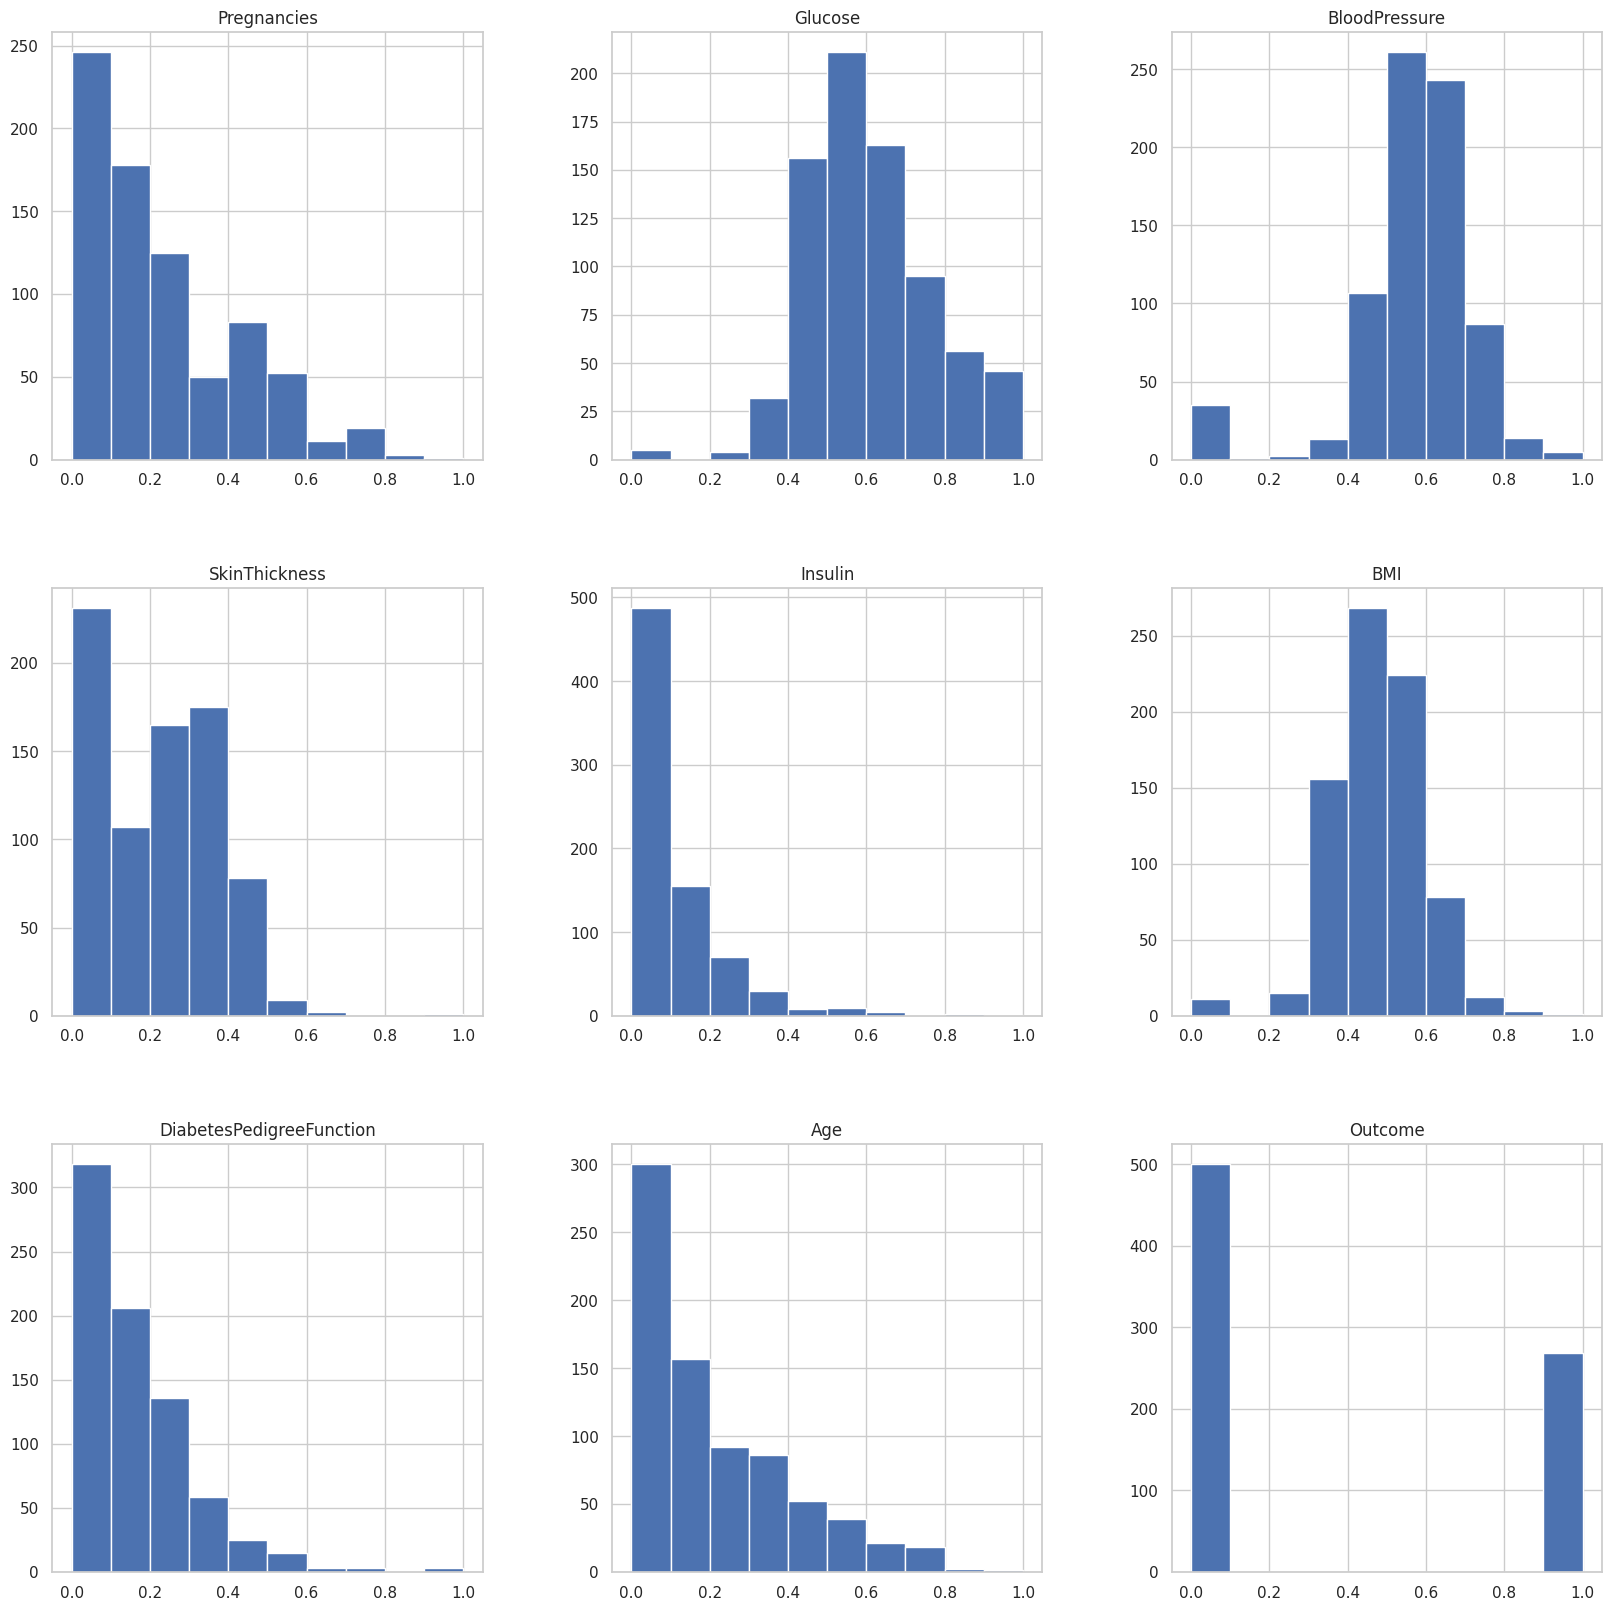

In [150]:
import matplotlib.pyplot as plt
df.hist(figsize=(20, 20))
plt.show()

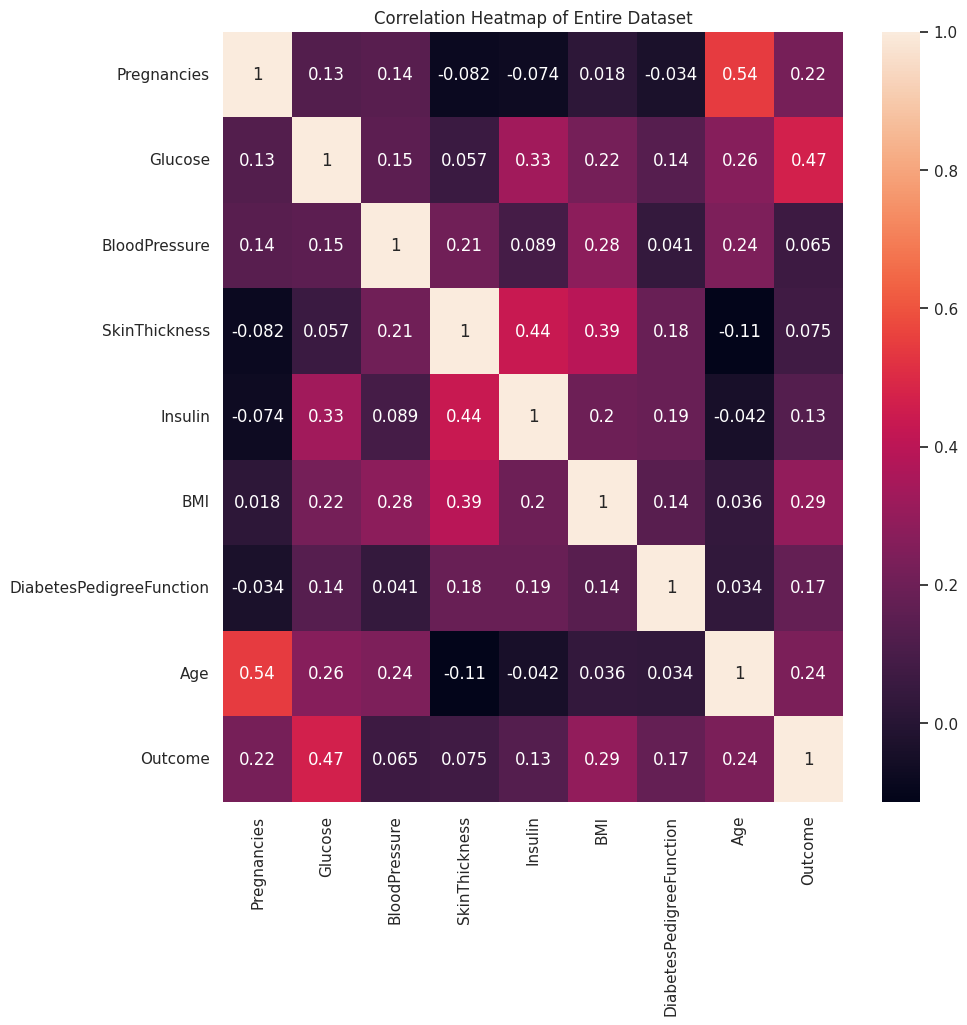

In [151]:
import seaborn as srn
plt.figure(figsize=(10, 10))
p = srn.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap of Entire Dataset")
plt.show()

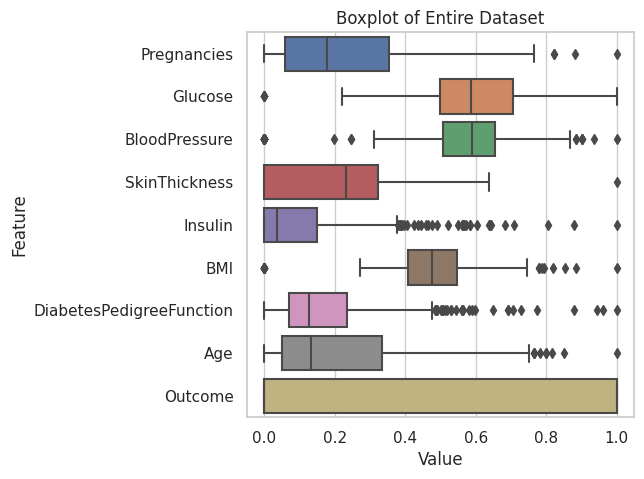

In [152]:
srn.set(style="whitegrid")
plt.figure(figsize=(5, 5))
srn.boxplot(df, orient="h")
plt.xlabel("Value")
plt.ylabel("Feature")
plt.title("Boxplot of Entire Dataset")
plt.show()

# **Several Model Implementation**



**LogisticRegression**

Individual fold scores: [0.72727273 0.68831169 0.70779221 0.75163399 0.75816993]
Mean score: 0.7266361089890502
Standard Deviation: 0.026243228372607705


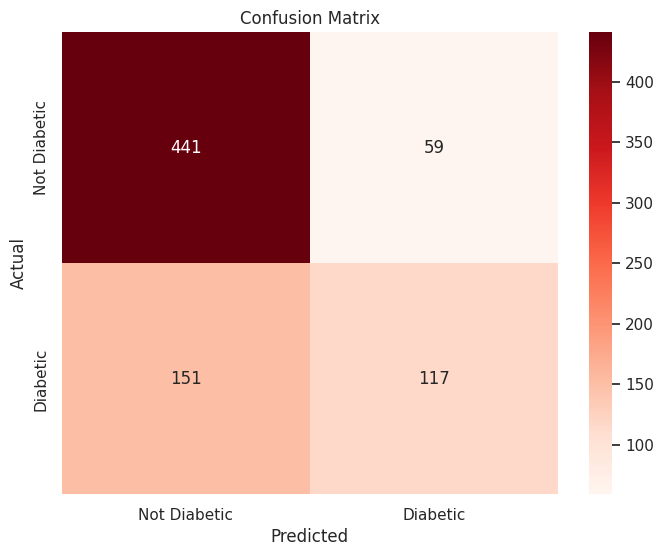

Accuracy: 0.7265625
Precision: 0.6647727272727273
Recall: 0.43656716417910446
F1 Score: 0.5270270270270271


In [153]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

x = principal_components
y = df.Outcome

lr = LogisticRegression()

scores = cross_val_score(lr, x, y, cv=5)
print("Individual fold scores:", scores)

mean_score = scores.mean()
std_deviation = scores.std()
print("Mean score:", mean_score)
print("Standard Deviation:", std_deviation)


predicted_labels = cross_val_predict(lr, x, y, cv=5)
conf_matrix = confusion_matrix(y, predicted_labels)
plt.figure(figsize=(8, 6))
srn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Diabetic', 'Diabetic'], yticklabels=['Not Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels)
recall = recall_score(y, predicted_labels)
f1 = f1_score(y, predicted_labels)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



**KNN**

Individual fold scores: [0.72727273 0.66883117 0.7012987  0.75163399 0.66666667]
Mean score: 0.7031406501994737
Standard Deviation: 0.03299953215793349


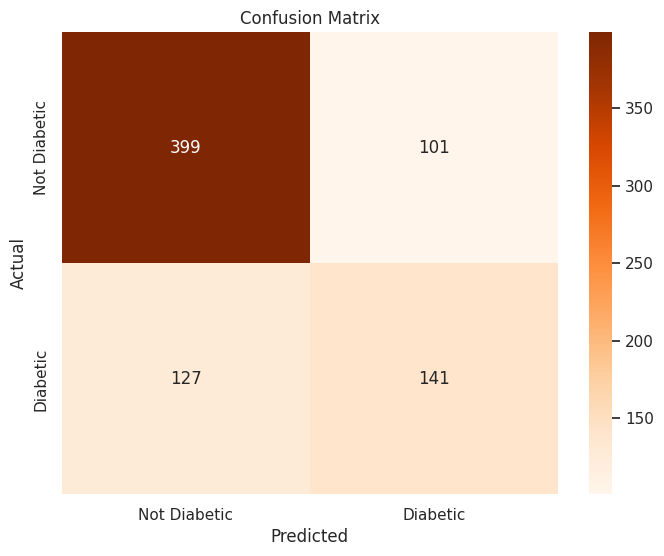

Accuracy: 0.703125
Precision: 0.5826446280991735
Recall: 0.5261194029850746
F1 Score: 0.5529411764705883


In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

x = principal_components
y = df.Outcome

knn = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(knn, x, y, cv=5)
print("Individual fold scores:", scores)

mean_score = scores.mean()
std_deviation = scores.std()
print("Mean score:", mean_score)
print("Standard Deviation:", std_deviation)


predicted_labels = cross_val_predict(knn, x, y, cv=5)
conf_matrix = confusion_matrix(y, predicted_labels)
plt.figure(figsize=(8, 6))
srn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=['Not Diabetic', 'Diabetic'], yticklabels=['Not Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels)
recall = recall_score(y, predicted_labels)
f1 = f1_score(y, predicted_labels)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


**NaiveBayes**

Individual fold scores: [0.73376623 0.75974026 0.72077922 0.75816993 0.7124183 ]
Mean score: 0.7369747899159664
Standard Deviation: 0.01919954808498247


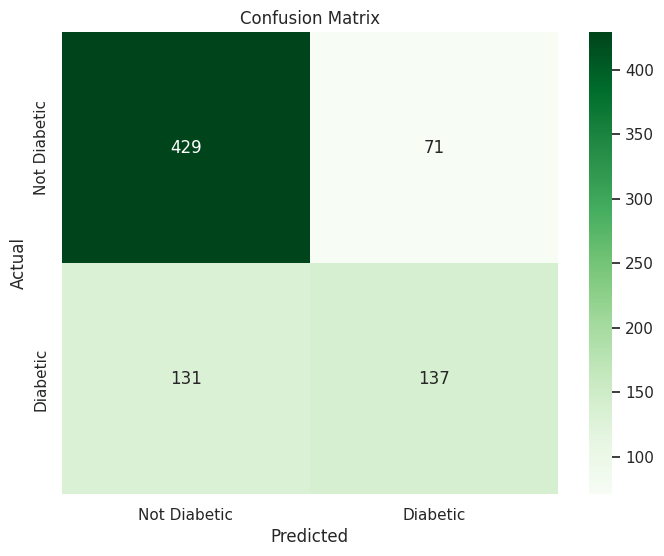

Accuracy: 0.7369791666666666
Precision: 0.6586538461538461
Recall: 0.5111940298507462
F1 Score: 0.5756302521008404


In [155]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB

x = principal_components
y = df.Outcome

nb = GaussianNB()

scores = cross_val_score(nb, x, y, cv=5)
print("Individual fold scores:", scores)

mean_score = scores.mean()
std_deviation = scores.std()
print("Mean score:", mean_score)
print("Standard Deviation:", std_deviation)


predicted_labels = cross_val_predict(nb, x, y, cv=5)
conf_matrix = confusion_matrix(y, predicted_labels)
plt.figure(figsize=(8, 6))
srn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Diabetic', 'Diabetic'], yticklabels=['Not Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels)
recall = recall_score(y, predicted_labels)
f1 = f1_score(y, predicted_labels)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



**DecisionTree**

Individual fold scores: [0.67532468 0.66233766 0.69480519 0.76470588 0.65359477]
Mean score: 0.6901536372124607
Standard Deviation: 0.03977399022851026


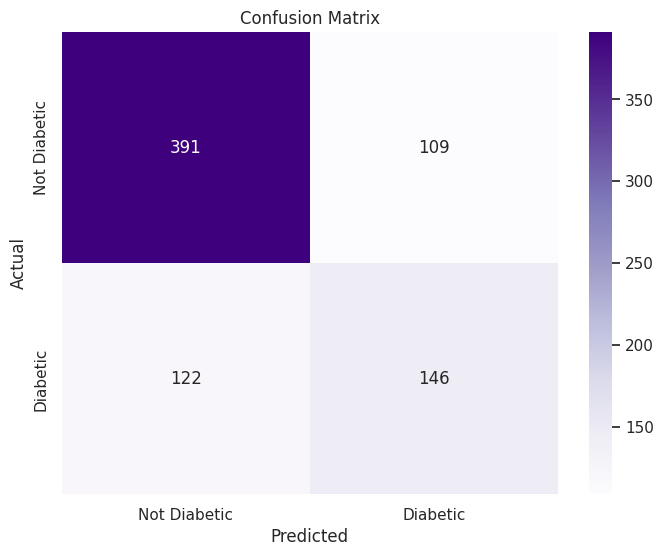

Accuracy: 0.69921875
Precision: 0.5725490196078431
Recall: 0.5447761194029851
F1 Score: 0.5583173996175907


In [156]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

x = principal_components
y = df.Outcome

dt = DecisionTreeClassifier(criterion='gini', max_depth=None)
scores = cross_val_score(dt, x, y, cv=5)
print("Individual fold scores:", scores)

mean_score = scores.mean()
std_deviation = scores.std()
print("Mean score:", mean_score)
print("Standard Deviation:", std_deviation)


predicted_labels = cross_val_predict(dt, x, y, cv=5)
conf_matrix = confusion_matrix(y, predicted_labels)
plt.figure(figsize=(8, 6))
srn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['Not Diabetic', 'Diabetic'], yticklabels=['Not Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels)
recall = recall_score(y, predicted_labels)
f1 = f1_score(y, predicted_labels)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

 **RandomForest**

Individual fold scores: [0.72727273 0.71428571 0.74025974 0.81045752 0.75163399]
Mean score: 0.7487819370172311
Standard Deviation: 0.03327844526905068


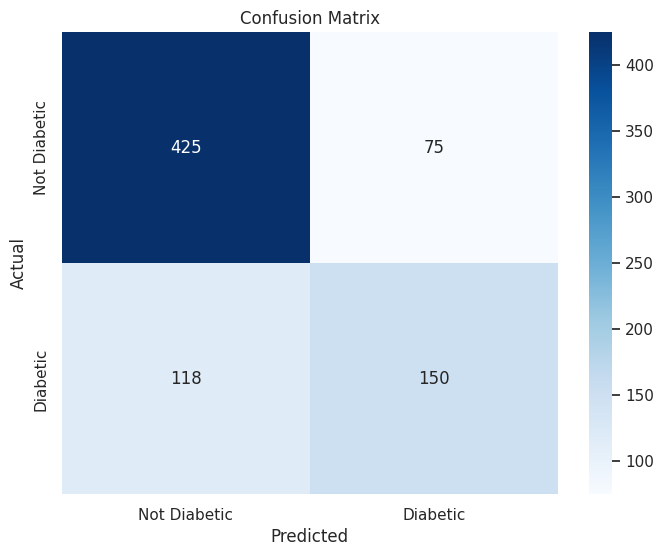

Accuracy: 0.7486979166666666
Precision: 0.6666666666666666
Recall: 0.5597014925373134
F1 Score: 0.6085192697768762


In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

x = principal_components
y = df.Outcome

rf = RandomForestClassifier(n_estimators=100, random_state=0)

scores = cross_val_score(rf, x, y, cv=5)
print("Individual fold scores:", scores)

mean_score = scores.mean()
std_deviation = scores.std()
print("Mean score:", mean_score)
print("Standard Deviation:", std_deviation)


predicted_labels = cross_val_predict(rf, x, y, cv=5)
conf_matrix = confusion_matrix(y, predicted_labels)
plt.figure(figsize=(8, 6))
srn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Diabetic', 'Diabetic'], yticklabels=['Not Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels)
recall = recall_score(y, predicted_labels)
f1 = f1_score(y, predicted_labels)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)